In [20]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline

import pickle
import re
import nltk
from sklearn.metrics import accuracy_score,fbeta_score,classification_report
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
stop=stopwords.words("english")
from nltk.stem.porter import PorterStemmer
from nltk.stem import SnowballStemmer
ss = SnowballStemmer("english")
ps = PorterStemmer()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_curve,roc_auc_score,auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


In [22]:
from google.colab import files
uploaded = files.upload()

Saving fullfinal9.csv to fullfinal9 (1).csv


In [23]:
import pandas as pd
import io
  
df = pd.read_csv(io.BytesIO(uploaded['fullfinal9.csv']))
print(df)

       Unnamed: 0                                             REVIEW  RATING
0               0  Very good mobile. I love thish phone. Really g...       5
1               1  Nice product fits in your budget segment.\n1) ...       4
2               2  Good phone. Budget friendly.\nBest in this bud...       3
3               3  Based on the usage for about 3 weeks, I am wri...       3
4               4  Perfect phone\n1. Amezing camera\n2. Good perf...       4
5               5  Good design. Not heavy. Good performance. Good...       5
6               6  Hi guys I here give u a complete review of thi...       4
7               7  Really amazed with the performance of this pho...       4
8               8  Good quality of screen. Camera is average. Bat...       5
9               9  Super working, awesome camera clarity & batter...       5
10             10  Simply awesome display and battery back up cos...       5
11             11  Best mobile in this price range. Camera would ...       5

In [24]:
df=df.sort_values(by='RATING')

In [25]:
df.head()


Unnamed: 0                                             REVIEW  RATING
5359          954  If product is worst. Within 2 days of Delivery...       1
27040         666  Don't buy this phone. Its not good. Camera is ...       1
30743        1379                          Back camera📷 very bad👎👎👎👎       1
30742        1378  processer.....is very bad working\nand highest...       1
30741        1377  Pathetic buy .... Very disappointed with this ...       1

In [8]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

print(df)

       Unnamed: 0                                             REVIEW  RATING
5359          954  If product is worst. Within 2 days of Delivery...       1
27040         666  Don't buy this phone. Its not good. Camera is ...       1
30743        1379                          Back camera📷 very bad👎👎👎👎       1
30742        1378  processer.....is very bad working\nand highest...       1
30741        1377  Pathetic buy .... Very disappointed with this ...       1
27039         665                                    Knot up to mark       1
30740        1376                          Money weast worst mobiles       1
30739        1375                                              Waste       1
12519        4114  Within a month no charging and no support otg....       1
27038         664  Front camera is not good .\nPubg not playable ...       1
27037         663                   Front camera quality is not good       1
30738        1374                                   DISPLAY VERY BAD       1

In [26]:
df.shape

(35354, 3)

In [27]:
# Number of rows to drop
n = 10000
  
# Dropping last n rows using drop
df.drop(df.tail(n).index,
        inplace = True)
  
# Printing dataframe
print(df)

       Unnamed: 0                                             REVIEW  RATING
5359          954  If product is worst. Within 2 days of Delivery...       1
27040         666  Don't buy this phone. Its not good. Camera is ...       1
30743        1379                          Back camera📷 very bad👎👎👎👎       1
30742        1378  processer.....is very bad working\nand highest...       1
30741        1377  Pathetic buy .... Very disappointed with this ...       1
27039         665                                    Knot up to mark       1
30740        1376                          Money weast worst mobiles       1
30739        1375                                              Waste       1
12519        4114  Within a month no charging and no support otg....       1
27038         664  Front camera is not good .\nPubg not playable ...       1
27037         663                   Front camera quality is not good       1
30738        1374                                   DISPLAY VERY BAD       1

In [28]:
df.columns.values

array(['Unnamed: 0', 'REVIEW', 'RATING'], dtype=object)

In [29]:
df.shape

(25354, 3)

In [30]:
# Checking the data types of all the columns
df.dtypes

Unnamed: 0     int64
REVIEW        object
RATING         int64
dtype: object

In [31]:
df.describe()

Unnamed: 0        RATING
count  25354.000000  25354.000000
mean    1929.223081      3.104362
std     1171.678291      1.456584
min        0.000000      1.000000
25%      972.000000      2.000000
50%     1870.000000      3.000000
75%     2761.000000      4.000000
max     4986.000000      5.000000

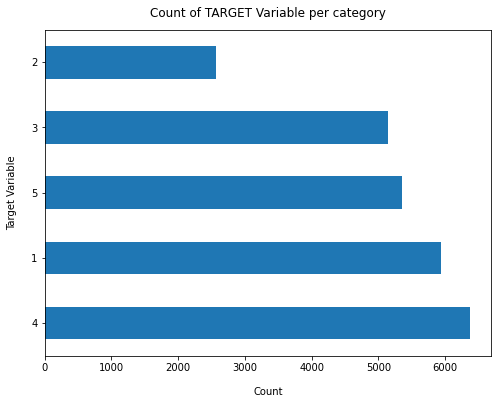

In [32]:
df['RATING'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);

In [33]:
df.groupby('RATING').count()


Unnamed: 0  REVIEW
RATING                    
1             5930    5930
2             2567    2567
3             5137    5137
4             6367    6367
5             5353    5353

In [34]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25354 entries, 5359 to 9684
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  25354 non-null  int64 
 1   REVIEW      25354 non-null  object
 2   RATING      25354 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 792.3+ KB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


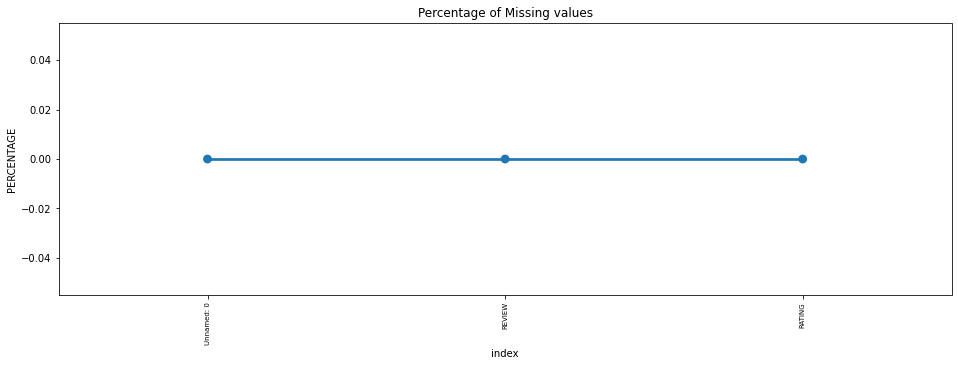

In [35]:
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

In [36]:
import string
def cleanText(message):
    #message = message.translate(str.maketrans('ranjan', 'ranjan', string.punctuation))
    message = re.sub('[^a-zA-Z]', ' ', message)
    message = message.lower()
    message = message.split()
    words = [ss.stem(word) for word in message if word not in stop]
    return " ".join(words)

df["REVIEW"] = df["REVIEW"].apply(cleanText)
df.head(n = 10)

Unnamed: 0                                             REVIEW  RATING
5359          954  product worst within day deliveri phone star h...       1
27040         666  buy phone good camera worst hear problem user ...       1
30743        1379                                    back camera bad       1
30742        1378  process bad work highest heat problem dull per...       1
30741        1377        pathet buy disappoint phone feel like cheat       1
27039         665                                          knot mark       1
30740        1376                            money weast worst mobil       1
30739        1375                                               wast       1
12519        4114       within month charg support otg worst product       1
27038         664  front camera good pubg playabl good frame rate...       1

In [37]:
#  Convert text into vectors using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vec = TfidfVectorizer(max_features = 10000, stop_words='english')
features = tf_vec.fit_transform(df['REVIEW'])
x = features


In [38]:
df.head()

Unnamed: 0                                             REVIEW  RATING
5359          954  product worst within day deliveri phone star h...       1
27040         666  buy phone good camera worst hear problem user ...       1
30743        1379                                    back camera bad       1
30742        1378  process bad work highest heat problem dull per...       1
30741        1377        pathet buy disappoint phone feel like cheat       1

In [39]:
y=df['RATING']
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=56,test_size=.30)


In [40]:
y_train.shape,y_test.shape

((17747,), (7607,))

In [41]:
# LogisticRegression
LG = LogisticRegression(C=1, max_iter = 3000)

LG.fit(x_train, y_train)

y_pred_train = LG.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = LG.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.5678706260212993
Test accuracy is 0.4852109898777442
[[1455   51  164  107   41]
 [ 453   36  173   62   25]
 [ 357   31  460  516  177]
 [ 108   11  256 1057  479]
 [  67    0   94  744  683]]
              precision    recall  f1-score   support

           1       0.60      0.80      0.68      1818
           2       0.28      0.05      0.08       749
           3       0.40      0.30      0.34      1541
           4       0.43      0.55      0.48      1911
           5       0.49      0.43      0.46      1588

    accuracy                           0.49      7607
   macro avg       0.44      0.43      0.41      7607
weighted avg       0.46      0.49      0.46      7607



In [42]:
# DecisionTreeClassifier
DT = DecisionTreeClassifier()

DT.fit(x_train, y_train)
y_pred_train = DT.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = DT.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.7703837268270693
Test accuracy is 0.44971736558433023
[[1173  204  210  141   90]
 [ 332  129  173   62   53]
 [ 298   93  416  522  212]
 [  89   38  262 1071  451]
 [  64   15  130  747  632]]
              precision    recall  f1-score   support

           1       0.60      0.65      0.62      1818
           2       0.27      0.17      0.21       749
           3       0.35      0.27      0.30      1541
           4       0.42      0.56      0.48      1911
           5       0.44      0.40      0.42      1588

    accuracy                           0.45      7607
   macro avg       0.42      0.41      0.41      7607
weighted avg       0.44      0.45      0.44      7607



In [43]:
#RandomForestClassifier
RF = RandomForestClassifier()

RF.fit(x_train, y_train)
y_pred_train = RF.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = RF.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))



Training accuracy is 0.7703837268270693
Test accuracy is 0.49112659392664654
[[1415   59  168  105   71]
 [ 418   74  155   57   45]
 [ 341   36  447  514  203]
 [ 114    9  230 1096  462]
 [  59    6  102  717  704]]
              precision    recall  f1-score   support

           1       0.60      0.78      0.68      1818
           2       0.40      0.10      0.16       749
           3       0.41      0.29      0.34      1541
           4       0.44      0.57      0.50      1911
           5       0.47      0.44      0.46      1588

    accuracy                           0.49      7607
   macro avg       0.47      0.44      0.43      7607
weighted avg       0.48      0.49      0.47      7607



In [44]:

# xgboost
import xgboost
xgb = xgboost.XGBClassifier()
xgb.fit(x_train, y_train)
y_pred_train = xgb.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = xgb.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.4924212542965008
Test accuracy is 0.4720652031024057
[[1564    1   90  132   31]
 [ 533    2  116   78   20]
 [ 486    0  353  599  103]
 [ 218    0  190 1159  344]
 [ 178    0   44  853  513]]
              precision    recall  f1-score   support

           1       0.53      0.86      0.65      1818
           2       0.67      0.00      0.01       749
           3       0.45      0.23      0.30      1541
           4       0.41      0.61      0.49      1911
           5       0.51      0.32      0.39      1588

    accuracy                           0.47      7607
   macro avg       0.51      0.40      0.37      7607
weighted avg       0.49      0.47      0.42      7607



In [45]:
#AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=100)
ada.fit(x_train, y_train)
y_pred_train = ada.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = ada.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))


Training accuracy is 0.4737138671324731
Test accuracy is 0.4633889838306823
[[1463   84  123  108   40]
 [ 480   41  134   66   28]
 [ 454   28  361  522  176]
 [ 213   17  202  990  489]
 [ 143    5   58  712  670]]
              precision    recall  f1-score   support

           1       0.53      0.80      0.64      1818
           2       0.23      0.05      0.09       749
           3       0.41      0.23      0.30      1541
           4       0.41      0.52      0.46      1911
           5       0.48      0.42      0.45      1588

    accuracy                           0.46      7607
   macro avg       0.41      0.41      0.39      7607
weighted avg       0.44      0.46      0.43      7607



In [46]:

#KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train, y_train)
y_pred_train = knn.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = knn.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.457034991829605
Test accuracy is 0.36952806625476536
[[750 111 383 127 447]
 [224  60 213  72 180]
 [171 108 441 447 374]
 [ 70  58 311 892 580]
 [ 37  21 163 699 668]]
              precision    recall  f1-score   support

           1       0.60      0.41      0.49      1818
           2       0.17      0.08      0.11       749
           3       0.29      0.29      0.29      1541
           4       0.40      0.47      0.43      1911
           5       0.30      0.42      0.35      1588

    accuracy                           0.37      7607
   macro avg       0.35      0.33      0.33      7607
weighted avg       0.38      0.37      0.37      7607



In [ ]:
#grid cv RandomForestClassifier
import numpy as np 
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC


In [ ]:
#HYERPARAMETER TUNING
rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(x_train, y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [ ]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 200}

In [ ]:
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 200, max_depth=8, criterion='gini')


In [ ]:
rfc1.score(x_test, y_test)

0.45309701140756103

In [ ]:
y_pred_train = rfc1.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = rfc1.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))


Training accuracy is 0.44845839899785833
Test accuracy is 0.45309701140756103
[[ 149    0    0    0 1620]
 [  31    0    0    0  717]
 [  11    0    0    0 1521]
 [   2    0    0    0 1897]
 [   2    0    0    0 4657]]
              precision    recall  f1-score   support

           1       0.76      0.08      0.15      1769
           2       0.00      0.00      0.00       748
           3       0.00      0.00      0.00      1532
           4       0.00      0.00      0.00      1899
           5       0.45      1.00      0.62      4659

    accuracy                           0.45     10607
   macro avg       0.24      0.22      0.15     10607
weighted avg       0.32      0.45      0.30     10607



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
prediction=RF.predict(x_test)
prediction

array([1, 5, 1, ..., 1, 4, 5])

In [ ]:
df1 = pd.DataFrame(prediction)

In [ ]:
df1.to_csv('ratings_prediction_intern.csv')

In [ ]:
import joblib
joblib.dump(RF,"ratings_prediction_intern.pkl")

['ratings_prediction_intern.pkl']